In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Using the homog_mo_SMA weather data:

 - What is the overall trend in the temperature in Zürich? Is the trend the same in all months, or does it vary by month?

 - Were there multi-year periods in the past that were warmer or colder than the long-term avg? How long were they?

 - How much warmer (or cooler?) was Zürich in Jan 2017 compared to the past?

 - Were most months in 2017 warmer or cooler than the long-term average?

 - How do precipitation levels compare between summer 2017 and the historical avg? Winter 2017? Spring, fall?

 - What do you expect the average temp in summer 2018 to be (point or interval estimate)? Summer 2020?

In [3]:
df= pd.read_csv("homog_mo_SMA.csv")

df.head()

,Year,Month,Temperature,Precipitation
0,1864,1,-6.6,25.7
1,1864,2,-1.5,32.9
2,1864,3,4.5,51.0
3,1864,4,6.8,46.9
4,1864,5,12.3,78.4


In [57]:
df.describe()

,Year,Month,Temperature,Precipitation
count,1848.000000,1848.000000,1848.000000,1848.000000
mean,1940.500000,6.500000,8.443182,88.243398
std,44.467066,3.452987,6.791700,51.268045
min,1864.000000,1.000000,-9.000000,0.000000
25%,1902.000000,3.750000,2.600000,49.350000
50%,1940.500000,6.500000,8.400000,79.450000
75%,1979.000000,9.250000,14.800000,119.225000
max,2017.000000,12.000000,22.700000,359.200000


In [9]:
season = np.array(['winter', 'spring', 'summer', 'autumn'])

month = np.arange(12) + 1
season = season[(month // 3) % 4]
season = pd.DataFrame(season, index=range(1,13)).reset_index()
season.columns=["Month","Season"]
season

,Month,Season
0,1,winter
1,2,winter
2,3,spring
3,4,spring
4,5,spring
5,6,summer
6,7,summer
7,8,summer
8,9,autumn
9,10,autumn


In [245]:
df['Year'] = pd.to_datetime(df['Year'])

In [5]:
import calendar
df['Month_n'] = df['Month'].apply(lambda x: calendar.month_abbr[x])


In [6]:
df

,Year,Month,Temperature,Precipitation,Month_n
0,1864,1,-6.6,25.7,Jan
1,1864,2,-1.5,32.9,Feb
2,1864,3,4.5,51.0,Mar
3,1864,4,6.8,46.9,Apr
4,1864,5,12.3,78.4,May
...,...,...,...,...,...
1843,2017,8,19.5,102.2,Aug
1844,2017,9,13.1,106.8,Sep
1845,2017,10,11.3,39.8,Oct
1846,2017,11,4.8,88.5,Nov


In [32]:
av_s=pd.DataFrame(df.groupby(["Year","Season"])["Temperature"].agg("mean")).reset_index()
x_sum=av_s[av_s.Season=="summer"]["Year"]
x_sum

2      1864
6      1865
10     1866
14     1867
18     1868
       ... 
598    2013
602    2014
606    2015
610    2016
614    2017
Name: Year, Length: 154, dtype: int64

In [30]:
y_sum=av_s[av_s.Season=="summer"]["Temperature"]
y_sum

2      15.633333
6      16.933333
10     16.533333
14     16.533333
18     17.633333
         ...    
598    18.500000
602    17.333333
606    20.166667
610    18.266667
614    19.533333
Name: Temperature, Length: 154, dtype: float64

In [35]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x_sum,y_sum)
predict_y = slope * x_sum + intercept


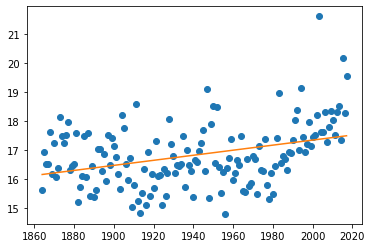

In [36]:
plt.plot(x_sum, y_sum, 'o')
plt.plot(x_sum, predict_y)
plt.show()

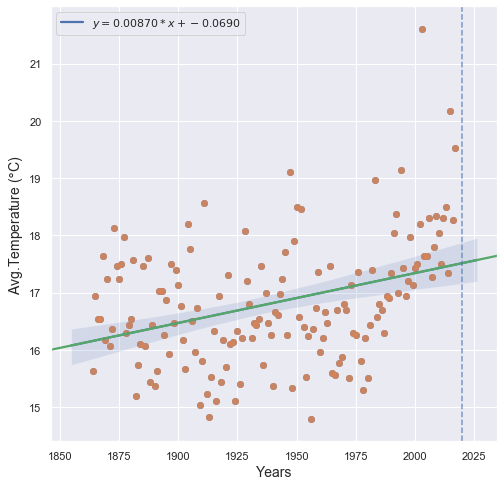

In [42]:
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8, 8)})
ax = sns.regplot(x=x_sum, y=y_sum, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)});
ax.legend()
sns.regplot(x=x_sum, y=y_sum, fit_reg=False, ax=ax);
sns.regplot(x=x_sum, y=predict_y,scatter=False, ax=ax);
ax.set_xlabel('Years', size=14)
ax.set_ylabel(r'Avg.Temperature ($\degree$C)', size=14)


ax.axvline(2020, linestyle='dashed', alpha=0.7)


In [47]:
av_year

x_j=av_year[av_year.Month_n=="Jan"]["Year"]
x_j

0      1864
1      1865
2      1866
3      1867
4      1868
       ... 
149    2013
150    2014
151    2015
152    2016
153    2017
Name: Year, Length: 154, dtype: int64

In [48]:
y_j=av_year[av_year.Month_n=="Jan"]["Temperature"]
y_j

0       6.691667
1       8.400000
2       8.758333
3       8.083333
4       9.191667
         ...    
149     9.058333
150    10.608333
151    10.566667
152     9.900000
153    10.158333
Name: Temperature, Length: 154, dtype: float64

In [50]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x_j,y_j)
predict_y = slope * x_j + intercept


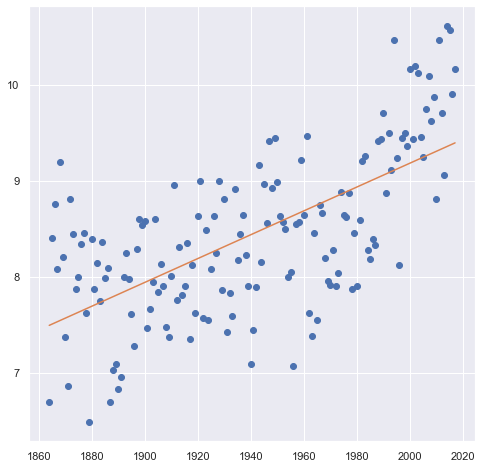

In [51]:
plt.plot(x_j, y_j, 'o')
plt.plot(x_j, predict_y)
plt.show()

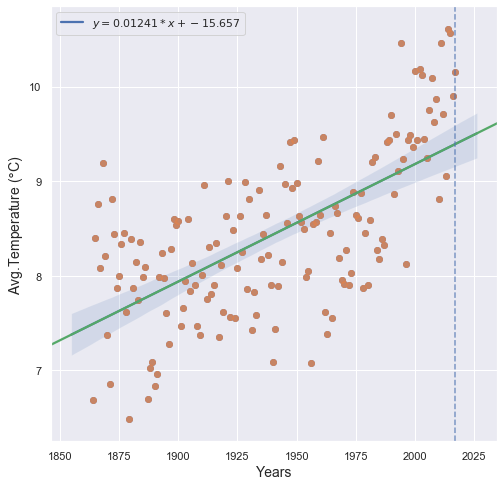

In [53]:
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8, 8)})
ax = sns.regplot(x=x_j, y=y_j, line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)});
ax.legend()
sns.regplot(x=x_j, y=y_j, fit_reg=False, ax=ax);
sns.regplot(x=x_j, y=predict_y,scatter=False, ax=ax);
ax.set_xlabel('Years', size=14)
ax.set_ylabel(r'Avg.Temperature ($\degree$C)', size=14)


ax.axvline(2017, linestyle='dashed', alpha=0.7)

In [54]:
9.37-8.44

0.9299999999999997

Text(0, 0.5, 'Avg.Temperature ($\\degree$C)')

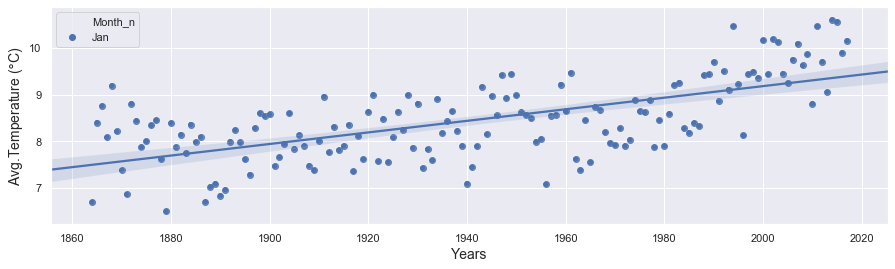

In [44]:
fig, ax = plt.subplots(figsize=(15,4))

sns.scatterplot(x='Year' , y='Temperature', hue="Month_n", data=av_year, ax=ax)
sns.regplot(x="Year", y="Temperature", data=av_year, ax=ax)

ax.set_xlabel('Years', size=14)
ax.set_ylabel(r'Avg.Temperature ($\degree$C)', size=14)

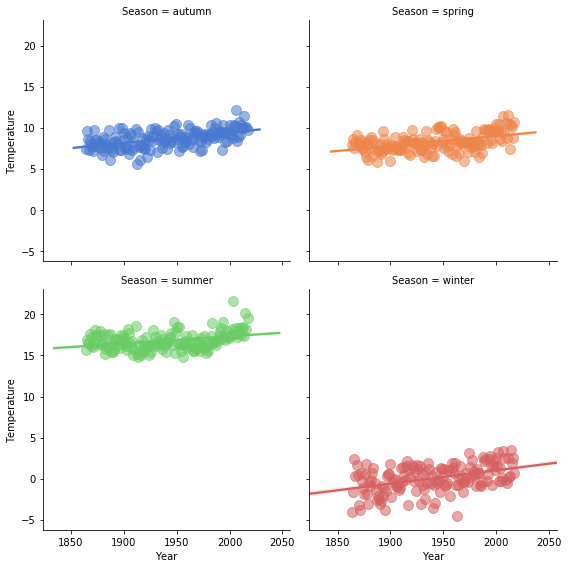

In [627]:
sns.lmplot(x="Year", y="Temperature", data=av_s, col="Season", hue= "Season",robust=False, ci=68,  
           palette ='muted',fit_reg=True,size=4, scatter_kws = {'s': 100, 'alpha': 0.55}, col_wrap = 2  ) 

In [14]:
av_year=pd.DataFrame(df.groupby("Year")["Temperature"].agg("mean")).reset_index()



In [15]:
av_year['Month_n']=df['Month_n']

In [16]:
av_year

,Year,Temperature,Month_n
0,1864,6.691667,Jan
1,1865,8.400000,Jan
2,1866,8.758333,Jan
3,1867,8.083333,Jan
4,1868,9.191667,Jan
...,...,...,...
149,2013,9.058333,Jan
150,2014,10.608333,Jan
151,2015,10.566667,Jan
152,2016,9.900000,Jan


In [328]:
av_year.describe()

,Year,Temperature
count,154.000000,154.000000
mean,1940.500000,8.443182
std,44.600075,0.854898
min,1864.000000,6.491667
25%,1902.250000,7.900000
50%,1940.500000,8.375000
75%,1978.750000,8.964583
max,2017.000000,10.608333


In [295]:
av_m=pd.DataFrame(df.groupby("Month")["Temperature"].agg("mean")).reset_index()
av_m['Month_n']=df['Month_n']
av_m.head()

,Month,Temperature,Month_n
0,1,-0.784416,Jan
1,2,0.592208,Feb
2,3,4.198701,Mar
3,4,8.144805,Apr
4,5,12.413636,May


Text(336.9714285714286, 0.5, 'Avg. Temperature, C')

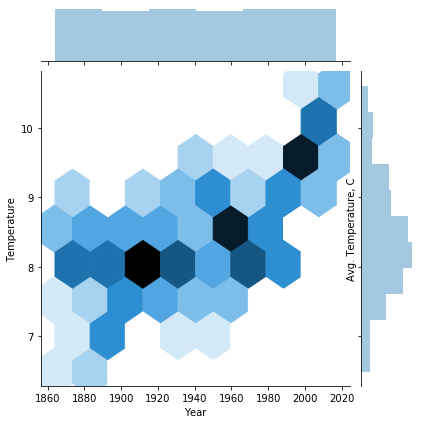

In [592]:
ax=sns.jointplot(x="Year", y="Temperature", kind="hex", data = av_year)

plt.ylabel("Avg. Temperature, C")

In [578]:
av_year

,Year,Temperature,Month_n
0,1864,6.691667,Jan
1,1865,8.400000,Jan
2,1866,8.758333,Jan
3,1867,8.083333,Jan
4,1868,9.191667,Jan
...,...,...,...
149,2013,9.058333,Jan
150,2014,10.608333,Jan
151,2015,10.566667,Jan
152,2016,9.900000,Jan


Text(336.9714285714286, 0.5, 'Avg. Temperature, C')

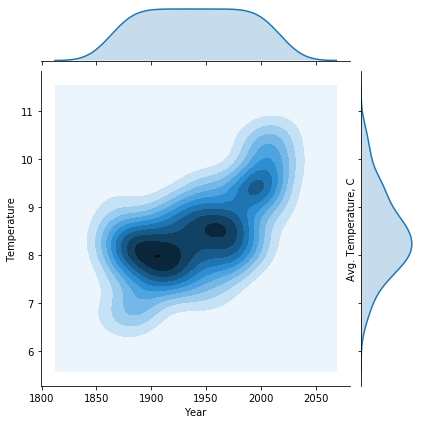

In [593]:
sns.jointplot(x="Year", y="Temperature",data = av_year, kind="kde");
plt.ylabel("Avg. Temperature, C")

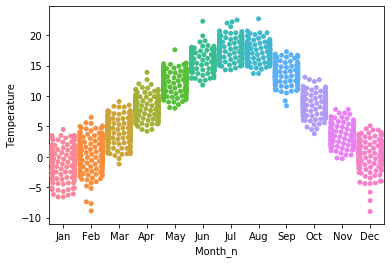

In [594]:
sns.swarmplot(x='Month_n' , y='Temperature', data=df)

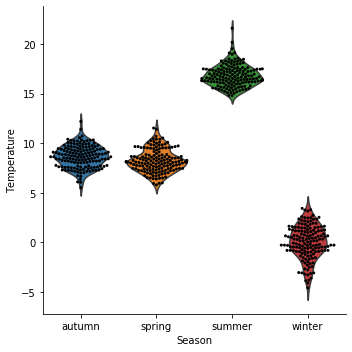

In [561]:
g = sns.catplot(x="Season", y="Temperature", kind="violin", inner=None, data=av_s)
sns.swarmplot(x="Season", y="Temperature", color="k", size=3, data=av_s, ax=g.ax);

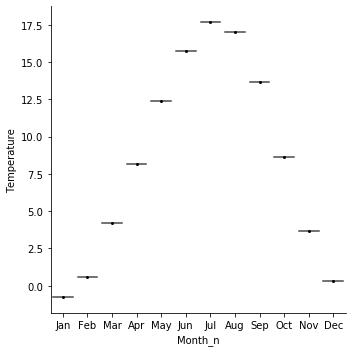

In [568]:
g = sns.catplot(x="Month_n", y="Temperature", kind="violin", inner=None, data=av_m)
sns.swarmplot(x="Month_n", y="Temperature", color="k", size=3, data=av_m, ax=g.ax);

In [639]:
df.tail()

,Year,Month,Temperature,Precipitation,Month_n,Season
1843,2013,12,1.7,33.5,Dec,winter
1844,2014,12,3.1,54.2,Dec,winter
1845,2015,12,4.4,10.1,Dec,winter
1846,2016,12,0.7,0.5,Dec,winter
1847,2017,12,1.3,114.7,Dec,winter


In [385]:
df.groupbydf["Month_n"][0]

'Jan'

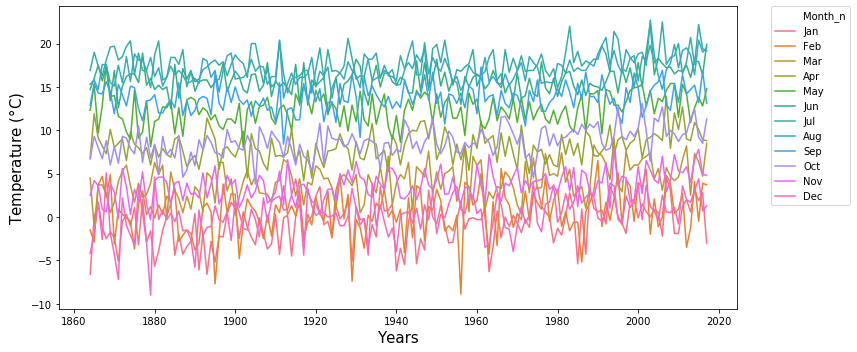

In [635]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(x=df['Year'],
         y=df['Temperature'],hue=df["Month_n"],
        color='Black')
#plt.plot(adf)
#plt.plot(tdf)
#ax.axvline("2007", linestyle='dashed', alpha=0.7)
#ax.text("2007", y=-2, s=' - 1973-11: Oil Price Shock',  color='b', size=13)
#ax.axvspan(1980, 2000, alpha=0.25, color='blue')
#sns.regplot(x='Year',y='Temperature',data=df, fit_reg=True) 

ax.set_xlabel('Years', size=15)
ax.set_ylabel(r'Temperature ($\degree$C)', size=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


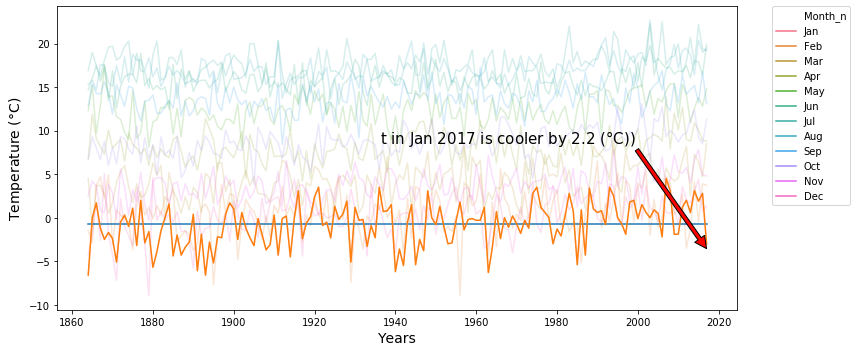

In [644]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(x=df['Year'],
         y=df['Temperature'],hue=df["Month_n"],
        color='Black', alpha=0.2)
plt.plot(adf)
plt.plot(tdf)
#ax.axvline("2007", linestyle='dashed', alpha=0.7)
#ax.text("2007", y=-2, s=' - 1973-11: Oil Price Shock',  color='b', size=13)
#ax.axvspan(1980, 2000, alpha=0.25, color='blue')
#sns.regplot(x='Year',y='Temperature',data=df, fit_reg=True) 
ax.annotate('t in Jan 2017 is cooler by 2.2 ($\degree$C))', xy=(df['Year'].max(),df['Temperature'].mean()-12),  xycoords='data',
            xytext=(0.85, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=1),
            horizontalalignment='right', verticalalignment='top',size=15,
            )
ax.set_xlabel('Years', size=14)
ax.set_ylabel(r'Temperature ($\degree$C)', size=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Average temperature change')

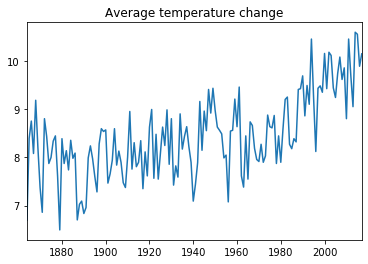

In [650]:
import statistics 
import matplotlib.pyplot as plt
dct = {}
for y in range(1864, 2018):
    dx = df[(df['Year'] >= y) & (df['Year'] < y + 1)]
    dct[y] = dx['Temperature'].mean()

mtdf = pd.Series(dct, index = dct.keys())
mtdf.plot()
plt.title("Average temperature change")


19.53333333333333
19.53333333333333


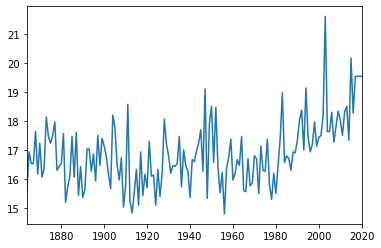

In [660]:
#What do you expect the average temp in summer 2018 to be (point or interval estimate)? 
import statistics 
import matplotlib.pyplot as plt


dct = {}
for y in range(1864, 2018):
    dx = df[(df['Year'] == y) & (df['Month'] >=6 ) & (df['Month'] <=8 )] #summer
    dct[y] = dx['Temperature'].mean()
dct[2020] = np.NaN

mtdf = pd.Series(dct, index = dct.keys())
imtdf = mtdf.interpolate()

print(imtdf[2018])
print(imtdf[2020])
imtdf.plot()

Cooler by 2.2300653594771243
-0.7699346405228759


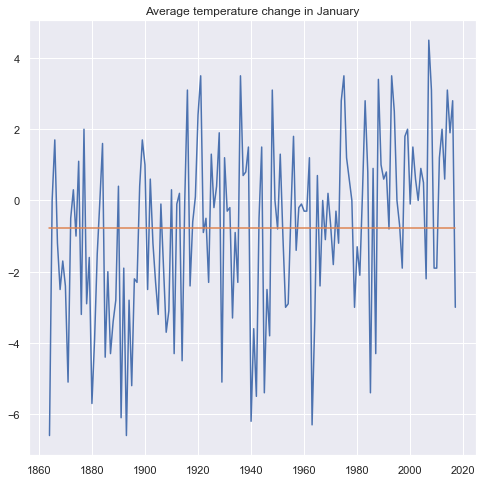

In [56]:

temps = []
for y in range(1864,2017):
    temp = float(df[(df['Year'] == y) & (df['Month'] == 1)]['Temperature'])
    temps.append(temp)
avg_temp = np.mean(temps)
temp_2017 = float(df[(df['Year'] == 2017) & (df['Month'] == 1)]['Temperature'])
temp_diff = abs(abs(temp_2017) - abs(avg_temp))
if avg_temp < temp_2017:
    print("Warmer by", temp_diff)
else:    
    print("Cooler by", temp_diff)
temps.append(temp_2017)
tdf = pd.DataFrame(temps, index = range(1864, 2018))
adf = pd.DataFrame([avg_temp]*len(temps), index = range(1864, 2018))
plt.plot(tdf)
plt.plot(adf)
plt.title("Average temperature change in January")
plt.show
print(avg_temp)

In [497]:
df

,Year,Month,Temperature,Precipitation,Month_n,Season
0,1864,1,-6.6,25.7,Jan,winter
1,1865,1,0.0,63.7,Jan,winter
2,1866,1,1.7,81.3,Jan,winter
3,1867,1,-1.2,134.4,Jan,winter
4,1868,1,-2.5,36.7,Jan,winter
...,...,...,...,...,...,...
1843,2013,12,1.7,33.5,Dec,winter
1844,2014,12,3.1,54.2,Dec,winter
1845,2015,12,4.4,10.1,Dec,winter
1846,2016,12,0.7,0.5,Dec,winter


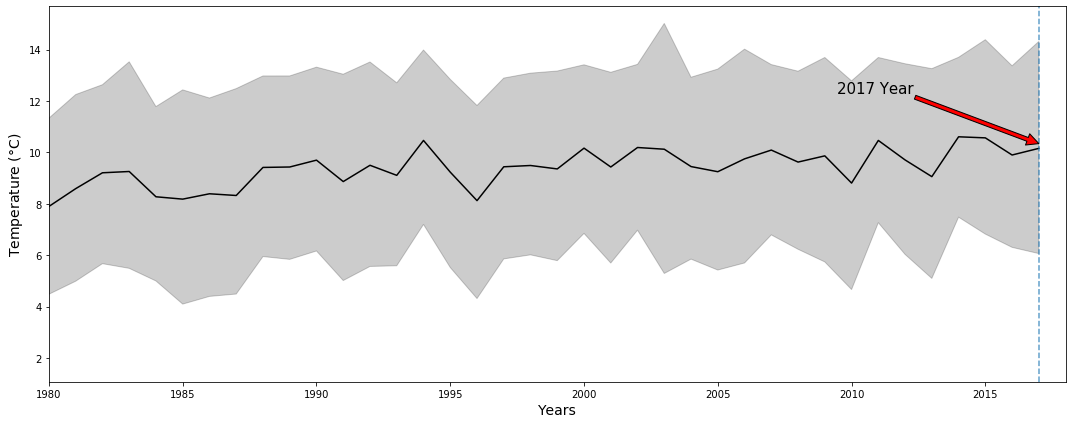

In [643]:
fig, ax = plt.subplots(figsize=(15,6))

sns.lineplot(x=df['Year'],
         y=df['Temperature'],
        color='Black')


ax.axvline(2017, linestyle='dashed', alpha=0.7)
#ax.text("2017", y=0, s=' - 1973-11: Oil Price Shock',  color='b', size=13)
#ax.axvspan(2016,2017, alpha=0.25, color='blue')
ax.annotate('2017 Year', xy=(df['Year'].max(),df['Temperature'].mean()+1.9),  xycoords='data',
            xytext=(0.85, 0.8), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=1),
            horizontalalignment='right', verticalalignment='top',size=15,
            )

ax.set_xlabel('Years', size=14)
ax.set_ylabel(r'Temperature ($\degree$C)', size=14)
#mtdf.plot()
ax.set_xlim([1980,2018])
plt.tight_layout()
plt.show()



1 correlation to year's mean 0.47561812840028755
2 correlation to year's mean 0.47056956640334036
3 correlation to year's mean 0.511772714667013
4 correlation to year's mean 0.46582595990625353
5 correlation to year's mean 0.3780479062175601
6 correlation to year's mean 0.3713437903735608
7 correlation to year's mean 0.41577965434116754
8 correlation to year's mean 0.5154629105726451
9 correlation to year's mean 0.3125750466824041
10 correlation to year's mean 0.5161529426852907
11 correlation to year's mean 0.43233414328661146
12 correlation to year's mean 0.5403773541735708


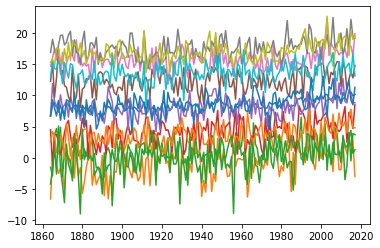

In [8]:

dct = {}
for y in range(1864, 2018):
    dx = df[(df['Year'] >= y) & (df['Year'] < y + 1)]
    dct[y] = dx['Temperature'].mean()

mtdf = pd.Series(dct, index = dct.keys())
plt.plot(mtdf)

mdtc = {}
for month in range(1,13):
    temps = []
    for y in range(1864,2018):
        temp = float(df[(df['Year'] == y) & (df['Month'] == month)]['Temperature'])
        temps.append(temp)
    tempsdf = pd.Series(temps, index = range(1864, 2018))
    mdtc[month]=tempsdf
    plt.plot(tempsdf)
    print(month, "correlation to year's mean", mdtc[month].corr(mtdf))
plt.show()


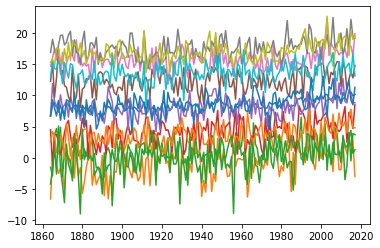

In [467]:
#What is the overall trend in the temperature in Zürich? 
#Is the trend the same in all months, or does it vary by month?
import statistics 
import matplotlib.pyplot as plt


dct = {}
for y in range(1864, 2018):
    dx = df[(df['Year'] >= y) & (df['Year'] < y + 1)]
    dct[y] = dx['Temperature'].mean()

mtdf = pd.Series(dct, index = dct.keys())
plt.plot(mtdf)

for month in range(1,13):
    temps = []
    for y in range(1864,2018):
        temp = float(df[(df['Year'] == y) & (df['Month'] == month)]['Temperature'])
        temps.append(temp)
    tempsdf = pd.Series(temps, index = range(1864, 2018))
    plt.plot(tempsdf)

plt.show()

In [352]:
sum_temp = 0
for y in range(1864,2017):
    temp = float(df[(df['Year'] == y) & (df['Month'] == 1)]['Temperature'])
    sum_temp += temp
avg_temp = sum_temp/(2017-1864)
temp_2017 = float(df[(df['Year'] == 2017) & (df['Month'] == 1)]['Temperature'])
temp_diff = abs(abs(temp_2017) - abs(avg_temp))
if avg_temp < temp_2017:
    print("Warmer by", temp_diff)
else:    
    print("Cooler by", temp_diff)

Cooler by 2.2300653594771243


In [361]:

print(temps)

[-6.6, 0.0, 1.7, -1.2, -2.5, -1.7, -2.4, -5.1, -0.5, 0.3, -1.0, 1.1, -3.2, 2.0, -2.9, -1.6, -5.7, -3.9, -1.5, 0.0, 1.6, -4.4, -2.0, -4.3, -3.4, -2.8, 0.4, -6.1, -1.9, -6.6, -2.8, -5.2, -2.2, -2.3, 0.4, 1.7, 1.0, -2.5, 0.6, -1.2, -2.3, -3.2, -0.1, -1.9, -3.7, -3.1, 0.3, -4.3, -0.1, 0.2, -4.5, 0.0, 3.1, -2.4, -0.6, 0.1, 2.4, 3.5, -0.9, -0.5, -2.3, 1.3, -0.2, 0.4, 1.9, -5.1, 1.2, -0.3, -0.2, -3.3, -0.9, -2.3, 3.5, 0.7, 0.8, 1.5, -6.2, -3.6, -5.5, -0.5, 1.5, -5.4, -2.5, -3.8, 3.1, 0.0, -0.8, 1.3, -1.0, -3.0, -2.9, -0.4, 1.8, -1.4, -0.2, -0.1, -0.3, -0.3, 1.2, -6.3, -3.4, 0.7, -2.4, 0.0, -1.1, 0.2, -0.7, -1.8, -0.3, -1.2, 2.8, 3.5, 1.2, 0.6, 0.0, -3.0, -1.3, -2.1, 0.2, 2.8, 0.8, -5.4, 0.9, -4.3, 3.4, 1.0, 0.6, 0.8, -0.8, 3.5, 2.5, 0.0, -0.7, -1.9, 1.8, 2.0, -0.1, 1.5, 0.6, 0.0, 0.9, 0.5, -2.2, 4.5, 3.1, -1.9, -1.9, 1.2, 2.0, 0.6, 3.1, 1.9, 2.8]


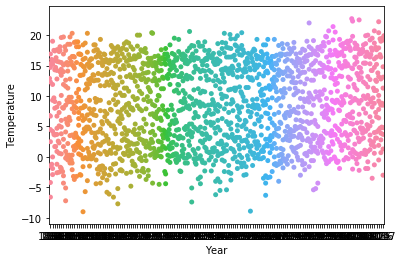

In [153]:
sns.swarmplot(x='Year' , y='Temperature', data=df)

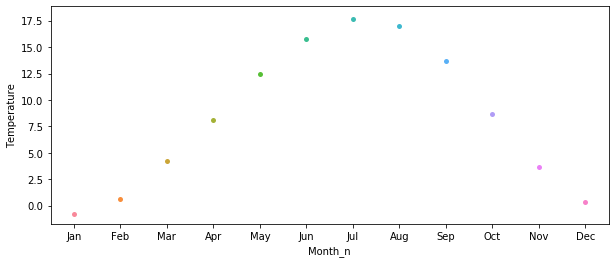

In [308]:
fig, ax = plt.subplots(figsize=(10,4))
sns.swarmplot(x='Month_n' , y='Temperature', data=av_m, ax=ax)

In [341]:
av=av_year.Temperature.mean()
av

8.443181818181818

,Year,Temperature
0,1864,6.691667
1,1865,8.400000
2,1866,8.758333
3,1867,8.083333
4,1868,9.191667
...,...,...
149,2013,9.058333
150,2014,10.608333
151,2015,10.566667
152,2016,9.900000


In [13]:
av_year.tail()

NameError: name 'av_year' is not defined

Text(0, 0.5, 'Avg.Temperature ($\\degree$C)')

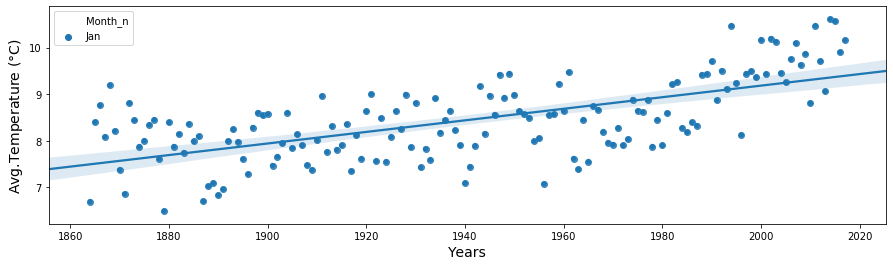

In [646]:
fig, ax = plt.subplots(figsize=(15,4))

sns.scatterplot(x='Year' , y='Temperature', hue="Month_n", data=av_year, ax=ax)
sns.regplot(x="Year", y="Temperature", data=av_year, ax=ax)
text = 'slop=%s, inter=%s' % (np.round(slope, 2), np.round(inter, 2))
ax.set_xlabel('Years', size=14)
ax.set_ylabel(r'Avg.Temperature ($\degree$C)', size=14)

#plt.plot("av", 0, linewidth=2)

In [28]:
#av_s.groupby(["Season","Temperature"]).mean()

In [29]:
slope, inter, r_val, p_val, std_err =stats.linregress(x_sum, y_sum)
slope, inter, r_val, p_val, std_err

NameError: name 'y_sum' is not defined

In [631]:
slope, inter, r_val, p_val, std_err =stats.linregress(av_s.Year,av_s["Temperature"])
slope, inter, r_val, p_val, std_err

(0.01241997092091969,
 -15.657771753862841,
 0.09096794506511985,
 0.02395424937952864,
 0.0054871092003236305)

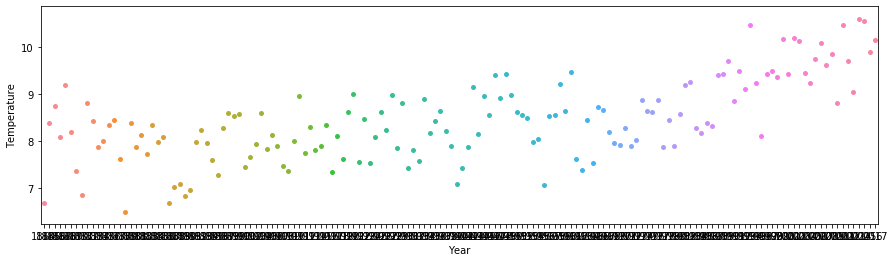

In [528]:
fig, ax = plt.subplots(figsize=(15,4))
sns.swarmplot(x='Year' , y='Temperature', data=av_year, ax=ax)
plt.plot(av)

In [10]:
df=df.merge(season, on ='Month')

In [11]:
#df=df.drop(["season"],1)
df

,Year,Month,Temperature,Precipitation,Month_n,Season
0,1864,1,-6.6,25.7,Jan,winter
1,1865,1,0.0,63.7,Jan,winter
2,1866,1,1.7,81.3,Jan,winter
3,1867,1,-1.2,134.4,Jan,winter
4,1868,1,-2.5,36.7,Jan,winter
...,...,...,...,...,...,...
1843,2013,12,1.7,33.5,Dec,winter
1844,2014,12,3.1,54.2,Dec,winter
1845,2015,12,4.4,10.1,Dec,winter
1846,2016,12,0.7,0.5,Dec,winter


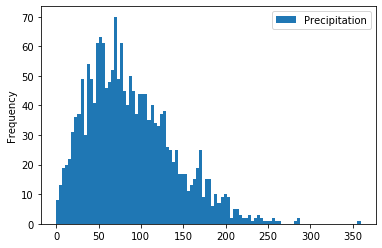

In [262]:
df.plot.hist(y='Precipitation', bins=100)

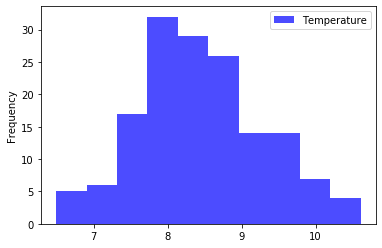

In [599]:
av_y.plot.hist(y='Temperature', color="b",alpha=0.7)

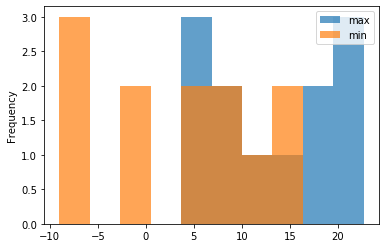

In [264]:
min_max.plot.hist(y=['max','min'], bins=10,alpha=0.7)

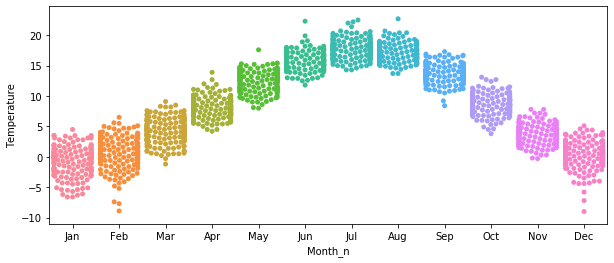

In [307]:
fig, ax = plt.subplots(figsize=(10,4))
sns.swarmplot(x='Month_n', y='Temperature', data=df, ax=ax)



In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.swarmplot(x='Month_n', y='Temperature', data=df, ax=ax)


In [275]:
df.dtypes

Year               int64
Month              int64
Temperature      float64
Precipitation    float64
Season_x          object
Season_y          object
dtype: object

In [326]:
import calendar
#max_min['Month'] = max_min['Month'].apply(lambda x: calendar.month_abbr[x])

In [370]:
min_max=pd.DataFrame(df.groupby("Month")["Temperature"].agg(["min", "max"])).reset_index()

In [371]:


min_max['Month_n']=df['Month_n']
min_max

,Month,min,max,Month_n
0,1,-6.6,4.5,Jan
1,2,-8.9,6.5,Jan
2,3,-1.2,9.1,Jan
3,4,4.2,13.9,Jan
4,5,8.0,17.6,Jan
5,6,11.8,22.3,Jan
6,7,14.3,22.5,Jan
7,8,13.7,22.7,Jan
8,9,8.4,17.3,Jan
9,10,3.8,13.1,Jan


In [278]:
formatter = calendar.month_abbr

In [314]:
min_max

,Month,min,max,Month_n
0,1,-6.6,4.5,Jan
1,2,-8.9,6.5,Jan
2,3,-1.2,9.1,Jan
3,4,4.2,13.9,Jan
4,5,8.0,17.6,Jan
5,6,11.8,22.3,Jan
6,7,14.3,22.5,Jan
7,8,13.7,22.7,Jan
8,9,8.4,17.3,Jan
9,10,3.8,13.1,Jan


In [607]:
min_max.

,Month,min,max,Month_n
0,1,-6.6,4.5,Jan
1,2,-8.9,6.5,Jan
2,3,-1.2,9.1,Jan
3,4,4.2,13.9,Jan
4,5,8.0,17.6,Jan
5,6,11.8,22.3,Jan
6,7,14.3,22.5,Jan
7,8,13.7,22.7,Jan
8,9,8.4,17.3,Jan
9,10,3.8,13.1,Jan


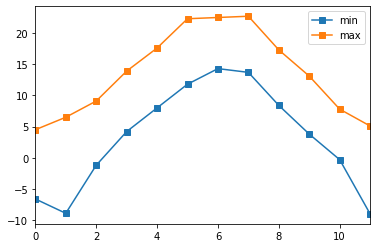

In [617]:
min_max.drop('Month',1).plot(style='s-')

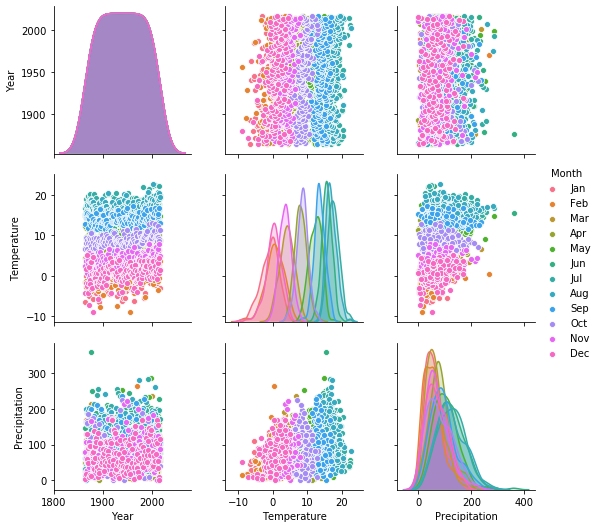

In [91]:
sns.pairplot(df, hue="Month")

In [653]:
summary2 = df.pivot("Year", "Month_n", "Temperature")
summary2.head()

Month_n,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1864,6.8,15.3,-4.2,-1.5,-6.6,16.9,14.7,4.5,12.3,2.5,6.7,12.9
1865,11.9,15.8,-1.9,-2.9,0.0,19.0,16.0,-1.2,15.2,4.2,9.3,15.4
1866,9.1,14.7,1.7,3.7,1.7,17.4,17.5,3.7,9.7,3.6,8.0,14.3
1867,8.2,17.6,-2.6,4.7,-1.2,16.3,15.7,3.7,12.8,0.9,6.7,14.2
1868,7.3,17.5,5.1,2.3,-2.5,18.1,17.3,2.6,17.6,0.6,8.8,15.6


In [661]:
summary = df.pivot("Month", "Year", "Temperature")
summary.head()

Year,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Month,,,,,,,,,,,,,,,,,,,,,
1,-6.6,0.0,1.7,-1.2,-2.5,-1.7,-2.4,-5.1,-0.5,0.3,...,3.1,-1.9,-1.9,1.2,2.0,0.6,3.1,1.9,2.8,-3.0
2,-1.5,-2.9,3.7,4.7,2.3,4.9,-3.1,0.9,0.3,-0.1,...,3.9,0.4,0.9,2.7,-3.5,-1.3,4.1,-0.5,3.9,3.7
3,4.5,-1.2,3.7,3.7,2.6,0.5,1.7,4.1,5.3,6.0,...,4.7,4.2,4.6,6.6,8.2,2.5,7.3,6.4,4.7,8.5
4,6.8,11.9,9.1,8.2,7.3,10.1,8.0,8.5,9.0,6.5,...,7.9,12.0,10.1,12.7,9.0,8.8,10.9,10.1,8.9,8.8
5,12.3,15.2,9.7,12.8,17.6,13.9,14.0,11.6,11.3,9.8,...,15.4,15.4,11.5,15.3,14.2,10.9,12.6,13.8,12.8,14.8


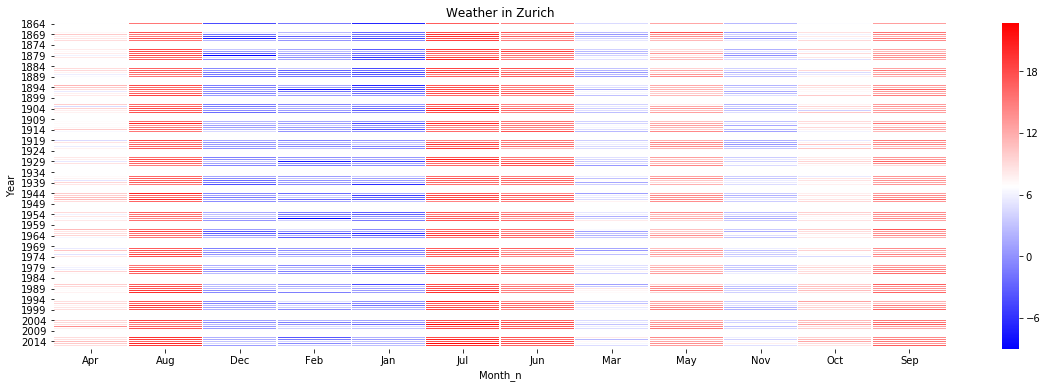

In [237]:
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(summary2, linewidths=.5, ax=ax ,cmap="bwr")

plt.title("Weather in Zurich")
plt.show()

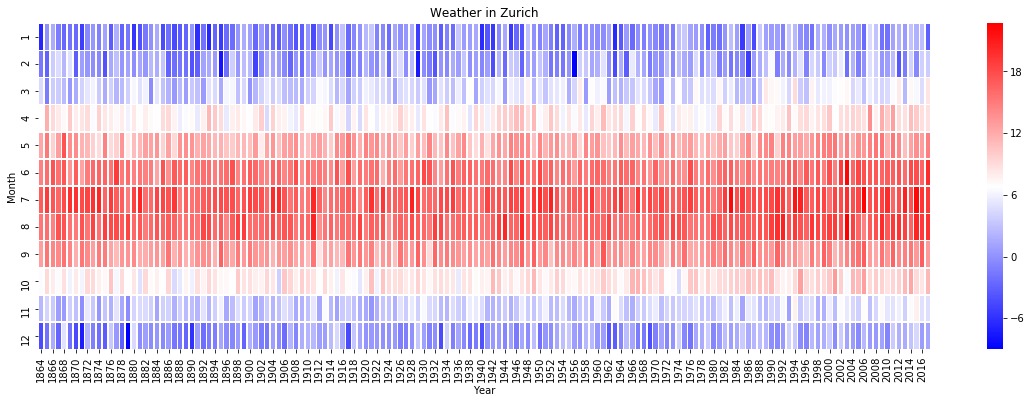

In [662]:
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(summary, linewidths=.5, ax=ax ,cmap="bwr")
plt.title("Weather in Zurich")


plt.show()

In [603]:
df

,Year,Month,Temperature,Precipitation,Month_n,Season
0,1864,1,-6.6,25.7,Jan,winter
1,1865,1,0.0,63.7,Jan,winter
2,1866,1,1.7,81.3,Jan,winter
3,1867,1,-1.2,134.4,Jan,winter
4,1868,1,-2.5,36.7,Jan,winter
...,...,...,...,...,...,...
1843,2013,12,1.7,33.5,Dec,winter
1844,2014,12,3.1,54.2,Dec,winter
1845,2015,12,4.4,10.1,Dec,winter
1846,2016,12,0.7,0.5,Dec,winter


C:\Users\ooles\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


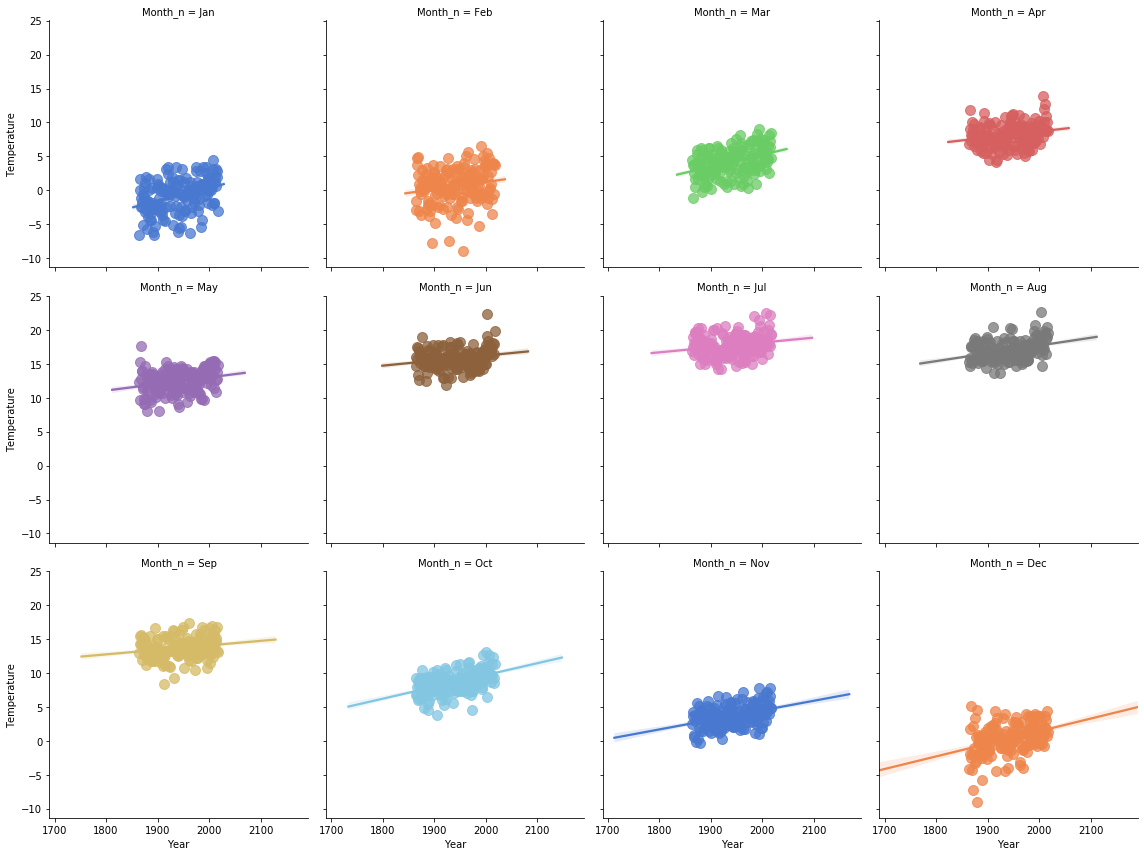

In [604]:
sns.lmplot(x="Year", y="Temperature", data=df, col="Month_n", hue= "Month_n",robust=False, ci=68,  
           palette ='muted',fit_reg=True,size=4, scatter_kws = {'s': 100, 'alpha': 0.75}, col_wrap = 4 ) 

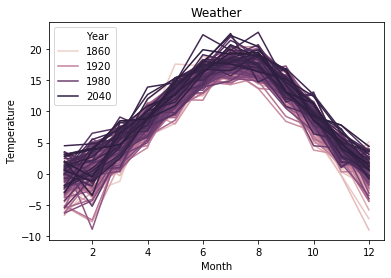

In [606]:
sns.lineplot(x="Month",y="Temperature",hue='Year',data=df).set_title('Weather')
plt.show()

In [207]:
df=df.sort_values(["Year","Month"])

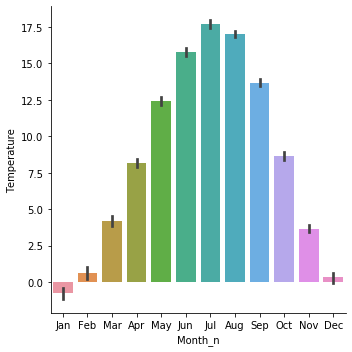

In [242]:
sns.catplot("Month_n", "Temperature", data=df, kind="bar")